<a href="https://colab.research.google.com/github/CubatLin/PaddleOCR/blob/develop/PaddleOCR_implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is PaddleOCR implementation by Ethan Wu

#### Step 1: Build environment & get necessary modules

In [1]:
def import_data_from_drive(id):
  !wget --save-cookies cookies.txt 'https://docs.google.com/uc?export=download&id='{id} -O- \
  | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1/p' > confirm.txt && wget --content-disposition --load-cookies cookies.txt 'https://docs.google.com/uc?export=download&id='{id}'&confirm='$(<confirm.txt) -q

# get image
import_data_from_drive('16tVQxas0nR9b9m4ZQO33DCHA9RmYF1_8')

--2023-09-19 04:01:53--  https://docs.google.com/uc?export=download&id=16tVQxas0nR9b9m4ZQO33DCHA9RmYF1_8
Resolving docs.google.com (docs.google.com)... 173.194.217.139, 173.194.217.100, 173.194.217.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.217.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nigaq34t3abfgedgjn0phfn64gu76q89/1695096075000/07903891748575983860/*/16tVQxas0nR9b9m4ZQO33DCHA9RmYF1_8?e=download&uuid=4e1d7e8f-b269-47bd-9a29-874673aa9e60 [following]
--2023-09-19 04:01:54--  https://doc-04-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nigaq34t3abfgedgjn0phfn64gu76q89/1695096075000/07903891748575983860/*/16tVQxas0nR9b9m4ZQO33DCHA9RmYF1_8?e=download&uuid=4e1d7e8f-b269-47bd-9a29-874673aa9e60
Resolving doc-04-1s-docs.googleusercontent.com (doc-04-1s-docs.googleusercontent.com)... 74.125.139.132, 2607:f

In [2]:
# get font & install libssl1
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download -q
!wget http://nz2.archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb -q
!sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb

/bin/bash: line 1: -q: command not found
--2023-09-19 04:01:55--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.218.139, 173.194.218.138, 173.194.218.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.218.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8pn2nn2ajaq71f3i4vbtakvsgec2goo7/1695096075000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=c83682d0-0e0f-4bbe-9f74-880f38dca9ab [following]
--2023-09-19 04:01:55--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8pn2nn2ajaq71f3i4vbtakvsgec2goo7/1695096075000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=c83682d0-0e0f-4bbe-9f74-880f38dca9ab
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.139.132

In [3]:
!pip install "paddleocr>=2.0.6" -q # 2.0.6 version is recommended
!pip install paddlepaddle -q
!pip install opencc-python-reimplemented -q

# !pip install paddlepaddle-gpu -q # IF GPU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.7/465.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 93.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 96.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

#### Step 2: import libraries

In [4]:
from PIL import Image
from paddleocr import PaddleOCR, draw_ocr
from opencc import OpenCC
import matplotlib.pyplot as plt
from google.colab import files

In [5]:
### config ###
IMG_PATH = '/content/桃園市_公文.jpg'  # image path
SAVE_PATH = 'ocr_result.jpg'  # save ocr result
FONT_PATH = '/content/TaipeiSansTCBeta-Regular.ttf'  # font path

ocr = PaddleOCR(use_angle_cls=True, lang="ch")
cc = OpenCC('s2tw')

download https://paddleocr.bj.bcebos.com/PP-OCRv4/chinese/ch_PP-OCRv4_det_infer.tar to /root/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer/ch_PP-OCRv4_det_infer.tar


100%|██████████| 4.89M/4.89M [00:09<00:00, 527kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/chinese/ch_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer/ch_PP-OCRv4_rec_infer.tar


100%|██████████| 11.0M/11.0M [00:11<00:00, 947kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:05<00:00, 367kiB/s]

[2023/09/19 04:03:47] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

In [6]:
def annotate_and_save(img_path, result, save_path, font_path):
    """
    img_path (str): 原始圖像的檔案路徑。
    result (list): OCR的結果。
    save_path (str): 標注後的圖像要保存的檔案路徑。
    font_path (str): 自定義字體的檔案路徑。
    """
    # open image & get single result
    image = Image.open(img_path).convert('RGB')
    single_results = result[0]

    # extract ocr features
    boxes = [line[0] for line in single_results]
    txts = [cc.convert(str(line[1][0])) for line in single_results]
    scores = [line[1][1] for line in single_results]

    # pin image by draw_ocr function
    im_show = draw_ocr(image, boxes, txts, scores, font_path=font_path)

    # convert numpy array to PIL image, then save
    im_show = Image.fromarray(im_show)
    im_show.save(save_path, quality=100)

#### Step 3: run and show result

In [7]:
def main():
    ocr_result = ocr.ocr(IMG_PATH, cls=False) # files are not all in horizontal format if cls=True.
    annotate_and_save(IMG_PATH, ocr_result, SAVE_PATH, FONT_PATH)

In [8]:
main()

[2023/09/19 04:03:50] ppocr DEBUG: dt_boxes num : 24, elapsed : 1.199855089187622
[2023/09/19 04:04:03] ppocr DEBUG: rec_res num  : 24, elapsed : 13.758874416351318


#### Step 4: check & download result

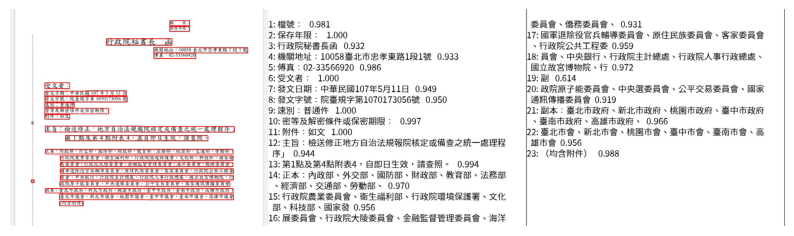

In [11]:
def resize_and_show_image(scale_factor, path):
    image = Image.open(path)
    width, height = image.size

    # enlarge image
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)
    image_resized = image.resize(size=(new_width, new_height),
                                 resample=Image.ANTIALIAS)

    plt.figure(figsize=(10, 10))
    plt.imshow(image_resized)
    plt.axis('off')
    plt.show()

resize_and_show_image(scale_factor=3, path=SAVE_PATH)

In [12]:
# download ocr_result.jpg
files.download(SAVE_PATH)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Referenece
* [OCR official multi_language](https://github.com/Mushroomcat9998/PaddleOCR/blob/main/doc/doc_en/multi_languages_en.md)
* [自定義數據](https://zhuanlan.zhihu.com/p/523972865)
* [載入預訓練模型](https://gitee.com/paddlepaddle/PaddleOCR/blob/release/2.5/doc/doc_ch/models_list.md#https://gitee.com/link?target=https%3A%2F%2Fpaddleocr.bj.bcebos.com%2FPP-OCRv3%2Fmultilingual%2Fchinese_cht_PP-OCRv3_rec_infer.tar)
* [libssl失敗處理方式](https://stackoverflow.com/questions/72133316/libssl-so-1-1-cannot-open-shared-object-file-no-such-file-or-directory)